<a href="https://colab.research.google.com/github/seungmei/ESAA_23_2/blob/main/12%EC%A3%BC%EC%B0%A8%EC%9B%94%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#12주차월과제
##파이썬 머신러닝 완벽가이드 393~395쪽
### Chapter 6. 차원축소
#### LDA(Linear DIscriminant Analysis)
##### LDA개요
선형 판별 분석법. PCA와 매우 유사. LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, 중요한 차이는 LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소.
- PCA는 입력 데이터의 변동성이 가장 큰 축을 찾음. <-> LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음.
- LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class-scatter)과 클래스 내부 분산(within-class scatter) 의 비율을 최대화하는 방식으로 차원을 축소. ; 즉 클래스 간 분산은 최대한 크게, 클래스 내부의 분산은 최대한 작게.

LDA 구하는 과정.
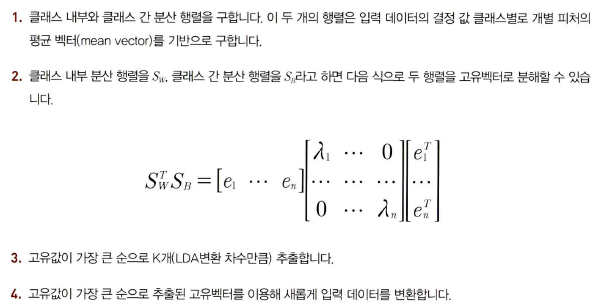

##### 붓꽃 데이터 세트에 LDA 적용하기

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

LDA는 **PCA와 다르게** 지도학습. ;즉 클래스의 결정값이 변환시에 필요.

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


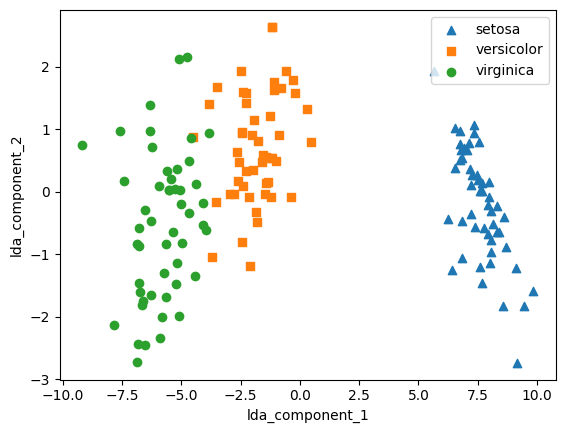

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target값은 0, versicolor는 1, virginica는 2.
#각 target별로 다른 모양으로 산점도로 표시
for i , marker in enumerate(markers):
  x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()